In [13]:
# Import all the necessary packages.
import pandas as pd
import os
import io
import matplotlib.pyplot as plt
import seaborn as sns
import msoffcrypto

In [2]:
def read_encrypted_excel(fpath, password):
    ''' Reads the encrypted Excek, returns a dataframe
    fpath: full path includingfilename
    password: Password for the Excel'''
    # Import the data
    
    unlocked_file = io.BytesIO()
 
    with open(fpath, "rb") as file:
        excel_file = msoffcrypto.OfficeFile(file)
        excel_file.load_key(password)
        excel_file.decrypt(unlocked_file)
 
    df = pd.read_excel(unlocked_file)

    return df

fpath = "Dataset 1 - Course Level Data.xlsx"
password = "BtVS.1997x2003.AHeard@$1.99"

df = read_encrypted_excel(fpath, password)

In [3]:
df.head()

,CentreName,AcademicYear,LearnerCode,BookingId,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,...,CreditWeightedAverage,ProgressionDegree,ProgressionUniversity,EligibleToProgress,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage
0,ISC_Aberdeen,2019/20,2284932,31261386,Agent,Standard Agent Booking,NaN,1998-01-13,Male,Chinese,...,75.0,Msc Econ Accounting and Investment Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,ISC_Aberdeen,2019/20,2399500,31979379,Agent,Standard Agent Booking,NaN,1998-02-12,Male,Chinese,...,73.0,BSc Biological Sciences,University of Aberdeen,Yes,80.0,0.0,93.0,5.0,215.0,97.0
2,ISC_Aberdeen,2019/20,2424946,27491184,Agent,Standard Agent Booking,NaN,2000-04-07,Male,Chinese,...,66.0,MA Finance,University of Aberdeen,Yes,88.0,0.0,92.0,6.0,226.0,97.0
3,ISC_Aberdeen,2019/20,2426583,28689190,Agent,Standard Agent Booking,NaN,1999-05-18,Male,Chinese,...,71.0,MA Business Management,University of Aberdeen,Yes,164.0,12.0,67.0,15.0,399.0,94.0
4,ISC_Aberdeen,2019/20,2434674,35141670,Agent,Standard Agent Booking,NaN,1996-04-19,Male,Chinese,...,60.0,MSc International Business Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

CentreName                      0
AcademicYear                    0
LearnerCode                     0
BookingId                       0
BookingType                     0
LeadSource                      0
DiscountType                17464
DateofBirth                     0
Gender                          0
Nationality                     0
HomeCountry                   346
HomeState                   16134
HomeCity                     3451
CourseLevel                     0
CourseName                      0
CourseFirstIntakeDate           0
IsFirstIntake                   0
CourseStartDate                 0
CourseEndDate                   0
CompletedCourse                 0
NonCompletionReason         21305
ArrivedDate                     0
TerminationDate             21305
AssessedModules              2231
PassedModules                2231
FailedModules                2231
CreditWeightedAverage        2296
ProgressionDegree             875
ProgressionUniversity           0
EligibleToProg

In [5]:
df[df.isnull().any(axis=1)]

,CentreName,AcademicYear,LearnerCode,BookingId,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,...,CreditWeightedAverage,ProgressionDegree,ProgressionUniversity,EligibleToProgress,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage
0,ISC_Aberdeen,2019/20,2284932,31261386,Agent,Standard Agent Booking,NaN,1998-01-13,Male,Chinese,...,75.0,Msc Econ Accounting and Investment Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,ISC_Aberdeen,2019/20,2399500,31979379,Agent,Standard Agent Booking,NaN,1998-02-12,Male,Chinese,...,73.0,BSc Biological Sciences,University of Aberdeen,Yes,80.0,0.0,93.0,5.0,215.0,97.0
2,ISC_Aberdeen,2019/20,2424946,27491184,Agent,Standard Agent Booking,NaN,2000-04-07,Male,Chinese,...,66.0,MA Finance,University of Aberdeen,Yes,88.0,0.0,92.0,6.0,226.0,97.0
3,ISC_Aberdeen,2019/20,2426583,28689190,Agent,Standard Agent Booking,NaN,1999-05-18,Male,Chinese,...,71.0,MA Business Management,University of Aberdeen,Yes,164.0,12.0,67.0,15.0,399.0,94.0
4,ISC_Aberdeen,2019/20,2434674,35141670,Agent,Standard Agent Booking,NaN,1996-04-19,Male,Chinese,...,60.0,MSc International Business Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25054,ISC_Teesside,2022/23,2786310,43796136,Agent,Standard Agent Booking,Bursary,1992-06-03,Male,Myanmarian,...,51.0,MSc Sustainable Engineering Systems,Teesside University,Yes,92.0,0.0,1.0,4.0,201.0,96.0
25055,ISC_Teesside,2022/23,2786483,43798894,Agent,Standard Agent Booking,NaN,1995-03-18,Male,Kenyan,...,78.0,MSc Data Science (with Advanced Practice),Teesside University,Yes,100.0,1.0,0.0,0.0,201.0,100.0
25056,ISC_Teesside,2022/23,2786493,43800570,Agent,Standard Agent Booking,Bursary,1997-08-21,Female,Malaysian,...,78.0,MSc International Management,Teesside University,Yes,106.0,0.0,0.0,2.0,216.0,98.0
25057,ISC_Teesside,2022/23,2789063,43819341,Agent,Standard Agent Booking,Other Scholarships / Bursaries,2002-01-07,Male,Pakistani,...,NaN,BA (Hons) International Business,Teesside University,No,60.0,1.0,0.0,74.0,273.0,45.0


In [6]:
df.duplicated().sum()

0

In [7]:
df['Nationality'].unique()

array(['Chinese', 'Iraqi', 'Kenyan', 'British', 'Kazakhstani',
       'Taiwanese', 'Lebanese', 'Kuwaiti', 'Qatari', 'Vietnamese',
       'Egyptian', 'Emirati', 'Hong Kong Chinese', 'Nigerian', 'Indian',
       'Myanmarian', 'Singaporean', 'Bahraini', 'Japanese', 'Bangladeshi',
       'Libyan', 'Jordanian', 'Saudi', 'Angolan', 'Namibian',
       'Zimbabwean', 'Ghanaian', 'American', 'Omani', 'Senegalese',
       'Brazilian', 'Ugandan', 'Turkish', 'Mexican', 'Peruvian',
       'Mozambican', 'Syrian', 'Pakistani', 'Mauritanian', 'German',
       'Afghan', 'Antiguan', 'Russian', 'Algerian', 'Guyanese',
       'Malaysian', 'Spanish', 'South Sudanese', 'Thai', 'Sri Lankan',
       'Grenadian', 'Korean', 'Guinean', 'Slovak', 'Belgian', 'Sudanese',
       'Indonesian', 'Moroccan', 'Venezuelan', 'Tanzanian', 'Gabonese',
       'Iranian', 'South African', 'Albanian', 'Irish', 'Nepalese',
       'Armenian', 'Ukrainian', 'Eritrean', 'Botswanan', 'Italian',
       'Azerbaijani', 'Uzbek', 'Dominica 

In [8]:
# Mapping of nationalities to continents
nationality_to_continent = {
    'Chinese': 'Asia', 'Iraqi': 'Asia', 'Kenyan': 'Africa', 'British': 'Europe', 'Kazakhstani': 'Asia',
    'Taiwanese': 'Asia', 'Lebanese': 'Asia', 'Kuwaiti': 'Asia', 'Qatari': 'Asia', 'Vietnamese': 'Asia',
    'Egyptian': 'Africa', 'Emirati': 'Asia', 'Hong Kong Chinese': 'Asia', 'Nigerian': 'Africa', 'Indian': 'Asia',
    'Myanmarian': 'Asia', 'Singaporean': 'Asia', 'Bahraini': 'Asia', 'Japanese': 'Asia', 'Bangladeshi': 'Asia',
    'Libyan': 'Africa', 'Jordanian': 'Asia', 'Saudi': 'Asia', 'Angolan': 'Africa', 'Namibian': 'Africa',
    'Zimbabwean': 'Africa', 'Ghanaian': 'Africa', 'American': 'North America', 'Omani': 'Asia', 'Senegalese': 'Africa',
    'Brazilian': 'South America', 'Ugandan': 'Africa', 'Turkish': 'Europe/Asia', 'Mexican': 'North America', 'Peruvian': 'South America',
    'Mozambican': 'Africa', 'Syrian': 'Asia', 'Pakistani': 'Asia', 'Mauritanian': 'Africa', 'German': 'Europe',
    'Afghan': 'Asia', 'Antiguan': 'North America', 'Russian': 'Europe/Asia', 'Algerian': 'Africa', 'Guyanese': 'South America',
    'Malaysian': 'Asia', 'Spanish': 'Europe', 'South Sudanese': 'Africa', 'Thai': 'Asia', 'Sri Lankan': 'Asia',
    'Grenadian': 'North America', 'Korean': 'Asia', 'Guinean': 'Africa', 'Slovak': 'Europe', 'Belgian': 'Europe', 'Sudanese': 'Africa',
    'Indonesian': 'Asia', 'Moroccan': 'Africa', 'Venezuelan': 'South America', 'Tanzanian': 'Africa', 'Gabonese': 'Africa',
    'Iranian': 'Asia', 'South African': 'Africa', 'Albanian': 'Europe', 'Irish': 'Europe', 'Nepalese': 'Asia',
    'Armenian': 'Asia', 'Ukrainian': 'Europe', 'Eritrean': 'Africa', 'Botswanan': 'Africa', 'Italian': 'Europe',
    'Azerbaijani': 'Asia', 'Uzbek': 'Asia', 'Dominica (Commonwealth)': 'North America', 'Belarusian': 'Europe',
    'Canadian': 'North America', 'Dominican Republic': 'North America', 'Bolivian': 'South America', 'Philippine': 'Asia',
    'Dutch': 'Europe', 'Israeli': 'Asia', 'Portuguese': 'Europe', 'Norwegian': 'Europe', 'Macau Chinese': 'Asia',
    'Romanian': 'Europe', 'Zambian': 'Africa', 'Bruneian': 'Asia', 'Seychelles': 'Africa', 'French': 'Europe', 'Swiss': 'Europe',
    'Ecuadorian': 'South America', 'Bahamian': 'North America', 'British National (Overseas)': 'Europe/Asia',
    'Honduran': 'North America', 'Cameroonian': 'Africa', 'Argentine': 'South America', 'Yemeni': 'Asia', 'Icelandic': 'Europe',
    'Liberian': 'Africa', 'Tunisian': 'Africa', 'Georgian': 'Europe/Asia', 'Swedish': 'Europe', 'Guatemalan': 'North America',
    'Chilean': 'South America', 'Mongolian': 'Asia', 'Polish': 'Europe', 'Kyrgyzstani': 'Asia', 'Latvian': 'Europe',
    'Colombian': 'South America', 'Czech': 'Europe', 'Greek': 'Europe', 'Cypriot': 'Europe', '(Not known)': 'Unknown',
    'Paraguayan': 'South America', 'Ethiopian': 'Africa', 'Cambodian': 'Asia', 'Palestinian': 'Asia', 'Rwandan': 'Africa',
    'Ivorian': 'Africa', 'Tajikistani': 'Asia', 'Mauritian': 'Africa', 'Kittitian': 'North America',
    'Sierra Leonean': 'Africa', 'Moldovan': 'Europe', 'Australian': 'Oceania', 'Bermudian': 'North America',
    'Panamanian': 'North America', 'Malawian': 'Africa', 'Equatoguinean': 'Africa', 'Maltese': 'Europe', 'Bulgarian': 'Europe',
    'Malian': 'Africa', 'Hungarian': 'Europe', 'Austrian': 'Europe', 'Swazi': 'Africa', 'Croatian': 'Europe',
    'New Zealand': 'Oceania', 'Uruguayan': 'South America', 'Turkmen': 'Asia', 'Danish': 'Europe', 'Burundi': 'Africa',
    'Fijian': 'Oceania', 'Trinidadian': 'North America', 'Nigerien': 'Africa', 'Maldivian': 'Asia', 'Serbian': 'Europe',
    'Nicaraguan': 'North America', 'Laotian': 'Asia', 'Bosnian': 'Europe', 'Barbadian': 'North America', 'Jamaican': 'North America'
}

# Add a 'continent' column based on the mapping
df['Continent'] = df['Nationality'].map(nationality_to_continent)

df.head()

,CentreName,AcademicYear,LearnerCode,BookingId,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,...,ProgressionDegree,ProgressionUniversity,EligibleToProgress,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage,Continent
0,ISC_Aberdeen,2019/20,2284932,31261386,Agent,Standard Agent Booking,NaN,1998-01-13,Male,Chinese,...,Msc Econ Accounting and Investment Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Asia
1,ISC_Aberdeen,2019/20,2399500,31979379,Agent,Standard Agent Booking,NaN,1998-02-12,Male,Chinese,...,BSc Biological Sciences,University of Aberdeen,Yes,80.0,0.0,93.0,5.0,215.0,97.0,Asia
2,ISC_Aberdeen,2019/20,2424946,27491184,Agent,Standard Agent Booking,NaN,2000-04-07,Male,Chinese,...,MA Finance,University of Aberdeen,Yes,88.0,0.0,92.0,6.0,226.0,97.0,Asia
3,ISC_Aberdeen,2019/20,2426583,28689190,Agent,Standard Agent Booking,NaN,1999-05-18,Male,Chinese,...,MA Business Management,University of Aberdeen,Yes,164.0,12.0,67.0,15.0,399.0,94.0,Asia
4,ISC_Aberdeen,2019/20,2434674,35141670,Agent,Standard Agent Booking,NaN,1996-04-19,Male,Chinese,...,MSc International Business Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Asia


In [9]:
df['Continent'].unique()

array(['Asia', 'Africa', 'Europe', 'North America', 'South America',
       'Europe/Asia', 'Unknown', 'Oceania'], dtype=object)

Text(0.5, 1.0, 'Credit Weighted Average by Continent')

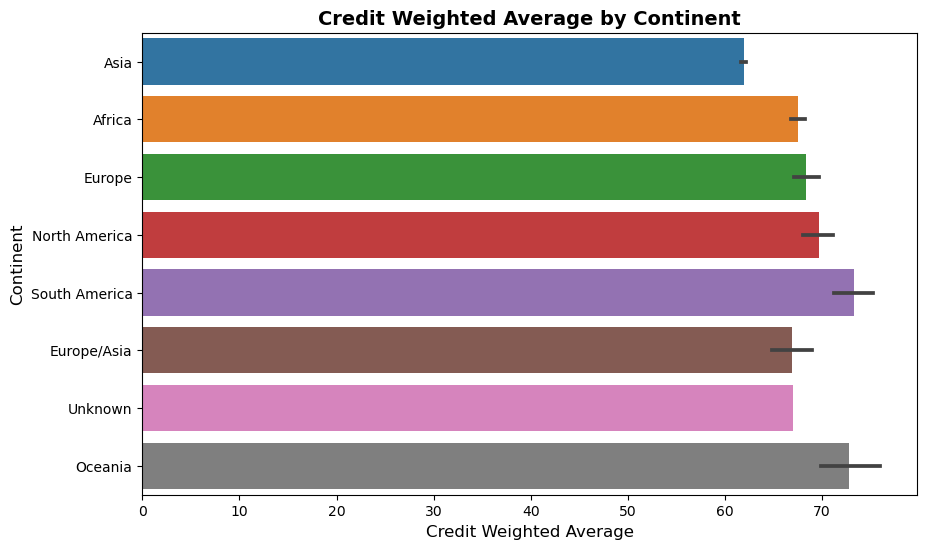

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CreditWeightedAverage', y='Continent', data=df)

plt.xlabel("Credit Weighted Average", fontsize=12)
plt.ylabel("Continent", fontsize=12)
plt.title("Credit Weighted Average by Continent", fontsize=14, weight='bold')

Text(0.5, 1.0, 'Number of Students by Continent')

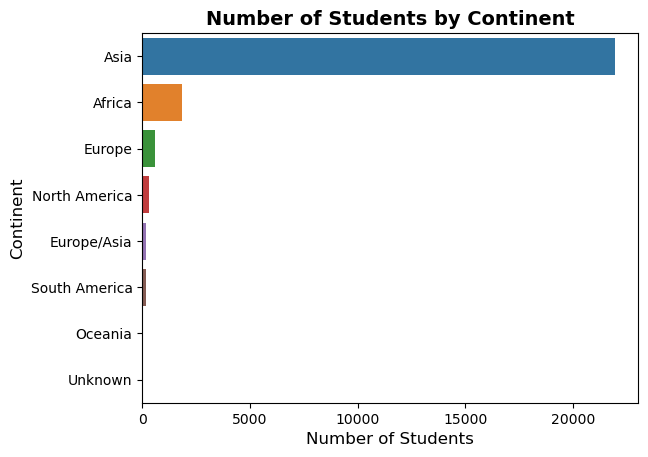

In [49]:
continent_counts = df['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Count']

sns.barplot(x='Count', y='Continent', data=continent_counts)

plt.xlabel("Number of Students", fontsize=12)
plt.ylabel("Continent", fontsize=12)
plt.title("Number of Students by Continent", fontsize=14, weight='bold')

In [29]:
continent_counts

,Continent,Count
0,Asia,21934
1,Africa,1837
2,Europe,589
3,North America,317
4,Europe/Asia,195
5,South America,177
6,Oceania,9
7,Unknown,1


In [41]:
df_ea = df[df['Continent'].isin(['Europe/Asia'])]

unique_nationalities = df_ea['Nationality'].unique()

unique_nationalities

array(['Turkish', 'Russian', 'British National (Overseas)', 'Georgian'],
      dtype=object)

In [43]:
ea_counts = df_ea['Nationality'].value_counts().reset_index()
ea_counts.columns = ['Nationality', 'Count']

ea_counts

,Nationality,Count
0,Turkish,106
1,Russian,70
2,British National (Overseas),14
3,Georgian,5


In [47]:
df2 = df[df['Continent'] != 'Unknown']

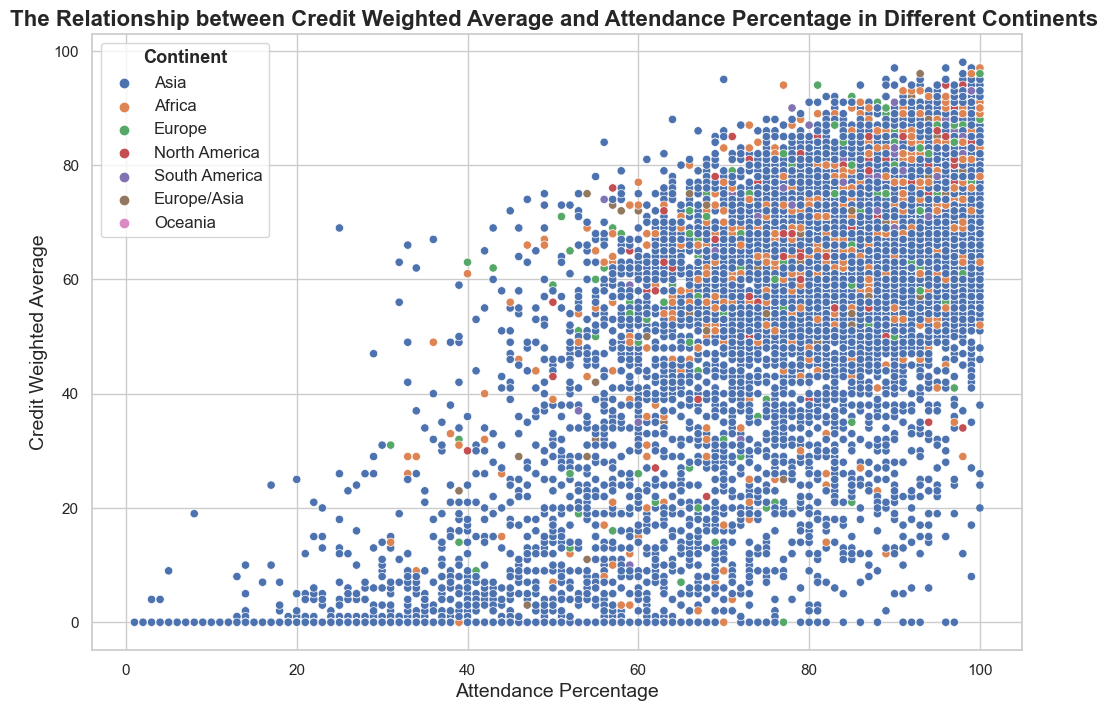

In [67]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='AttendancePercentage', y='CreditWeightedAverage', data=df2, hue='Continent')

plt.title("The Relationship between Credit Weighted Average and Attendance Percentage in Different Continents ", fontsize=16, fontweight='bold')
plt.xlabel("Attendance Percentage", fontsize=14)
plt.ylabel("Credit Weighted Average", fontsize=14)

legend = scatter.legend(title='Continent', fontsize=12, title_fontsize='13')
plt.setp(legend.get_title(), fontweight='bold');

In [ ]:
# Find a way to represent each continent equally so that comparison is easier (some kind of random sampling?)

# Identify students with a credit weighted average lower than 40 and look for any common significant factors

# How do we identify an at-risk student besides from credit wieghted average and attendance percentage

# Find a way to merge the dataset to enable time series analyis using module terms

# Combine analysis of course topic with continent 